<a href="https://colab.research.google.com/github/hima722/Retail-Sales-predictions-Machine-learning-project/blob/main/Retail_Sales_predictions_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name** - Retail Sales predictions Machine learning project


**Project Type** - Regression

**Contribution** - Team

**Member 1** -Himanshi Tyagi

**Project Summary -**

Data from Rossman Stores has been provided to us, and it contains several variables that have an impact on the stores' sales. We'll talk about the project overview here.

After outlining our problem statement, we started by gathering our data, which included loading datasets from importing libraries, checking for duplicate values (neither dataset contained any), and checking for null values (there were none in the Store dataset but there were some in the Rossman dataset). Then, we learned how to interpret our variables, which also included their descriptions and unique values. Then, we moved on to Data Wrangling, which involves handling null values with the aid of looking for outliers. Second, two datasets were combined. After that, we typecast.

At that point, we did information visualization to get the relationship between the variables.

After that, we performed feature engineering and data pre-processing, which included addressing missing values (we discovered none), handling outliers, categorical encoding, and other tasks. Next, feature manipulation and selection were performed. To create our final dataset, we computed VIF values. Then we scaled our data by using data scaling. As a result, the precision of the StandardScaler that we employed becomes more accurate.

Then we reached the main portion of the project, the ML Model Implementation, in which we used three different ML models: Linear Regression (including Lasso, Ridge, and Elastic Net), Decision Tree, and Random Forest. Of the three models, Random Forest proved to be the most successful, providing the most accurate result (98%).

**GitHub Link -**

**Problem Statement-**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann Stores, The task is to forecast the "Sales" column for the test set. Note that some Stores in the dataset were temporarily closed for refurbishment.

**General Guidelines : -**

1. Well-structured, formatted, and commented code is required.

2. Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
3. Each and every logic should have proper comments.

4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
        


 Will the gained insights help creating a positive business impact? Are there
any insights that lead to negative growth? Justify with specific reason.

*  Why did you pick the specific chart?
* What is/are the insight(s) found from the chart?
*   Will the gained insights help creating a positive business impact? Are there
any insights that lead to negative growth? Justify with specific reason.
  


5. You have to create at least 15 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

6.You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*
Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*  
Cross- Validation & Hyperparameter Tuning

*
Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*
Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# **Let's Begin !**

**1. Know Your Data**

Import Libraries

In [ ]:
import pandas as pd

In [ ]:
# Import Librarieshu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

# Data Preprocessing
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Hyperparameter Technique
from sklearn.model_selection import GridSearchCV

Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Rosmann Data
database ="/content/drive/MyDrive/Copy of Rossmann Stores Data (1).csv"
rossmann=pd.read_csv(database)
database="/content/drive/MyDrive/Copy of store (1).csv"
store = pd.read_csv(database)

<ipython-input-6-ec0c78e59450>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann=pd.read_csv(database)


Dataset First View

In [ ]:
# Top 5 rows of rossmann data set
rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Top 5 rows of store dateset
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Dataset Rows & Columns count


# Dataset Rows & Columns count

In [ ]:
# total rows and columns of rossmann data set.
print(f'Rossmann = {rossmann.shape[0]} Rows , {rossmann.shape[1]} columns.')

Rossmann = 1017209 Rows , 9 columns.


In [ ]:
# total rows and columns of rossmann data set.
print(f'Store = {store.shape[0]} Rows , {store.shape[1]} columns.')

Store = 1115 Rows , 10 columns.


Dataset Information

In [ ]:
# Dataset Info

In [ ]:
# Information about rossmann dataset.
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Information  about rossmann dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


 **Duplicate** **Values**

 Dataset Duplicate Value Count

In [ ]:
# check duplicate values in rossmann dataset
rossmann.duplicated().sum()

0

In [ ]:
store.duplicated().sum()

0

**Missing Values/Null Values**

Missing Values/Null Values Count

In [ ]:
# check missing / null value of rossmann dataset
rossmann.isnull().sum().sort_values(ascending = False)


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Check missing/null values of store data set.
store.isnull().sum().sort_values(ascending = False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64


**Visualizing the missing values**

In [ ]:
# import visualization library
import missingno as msno

<Axes: >

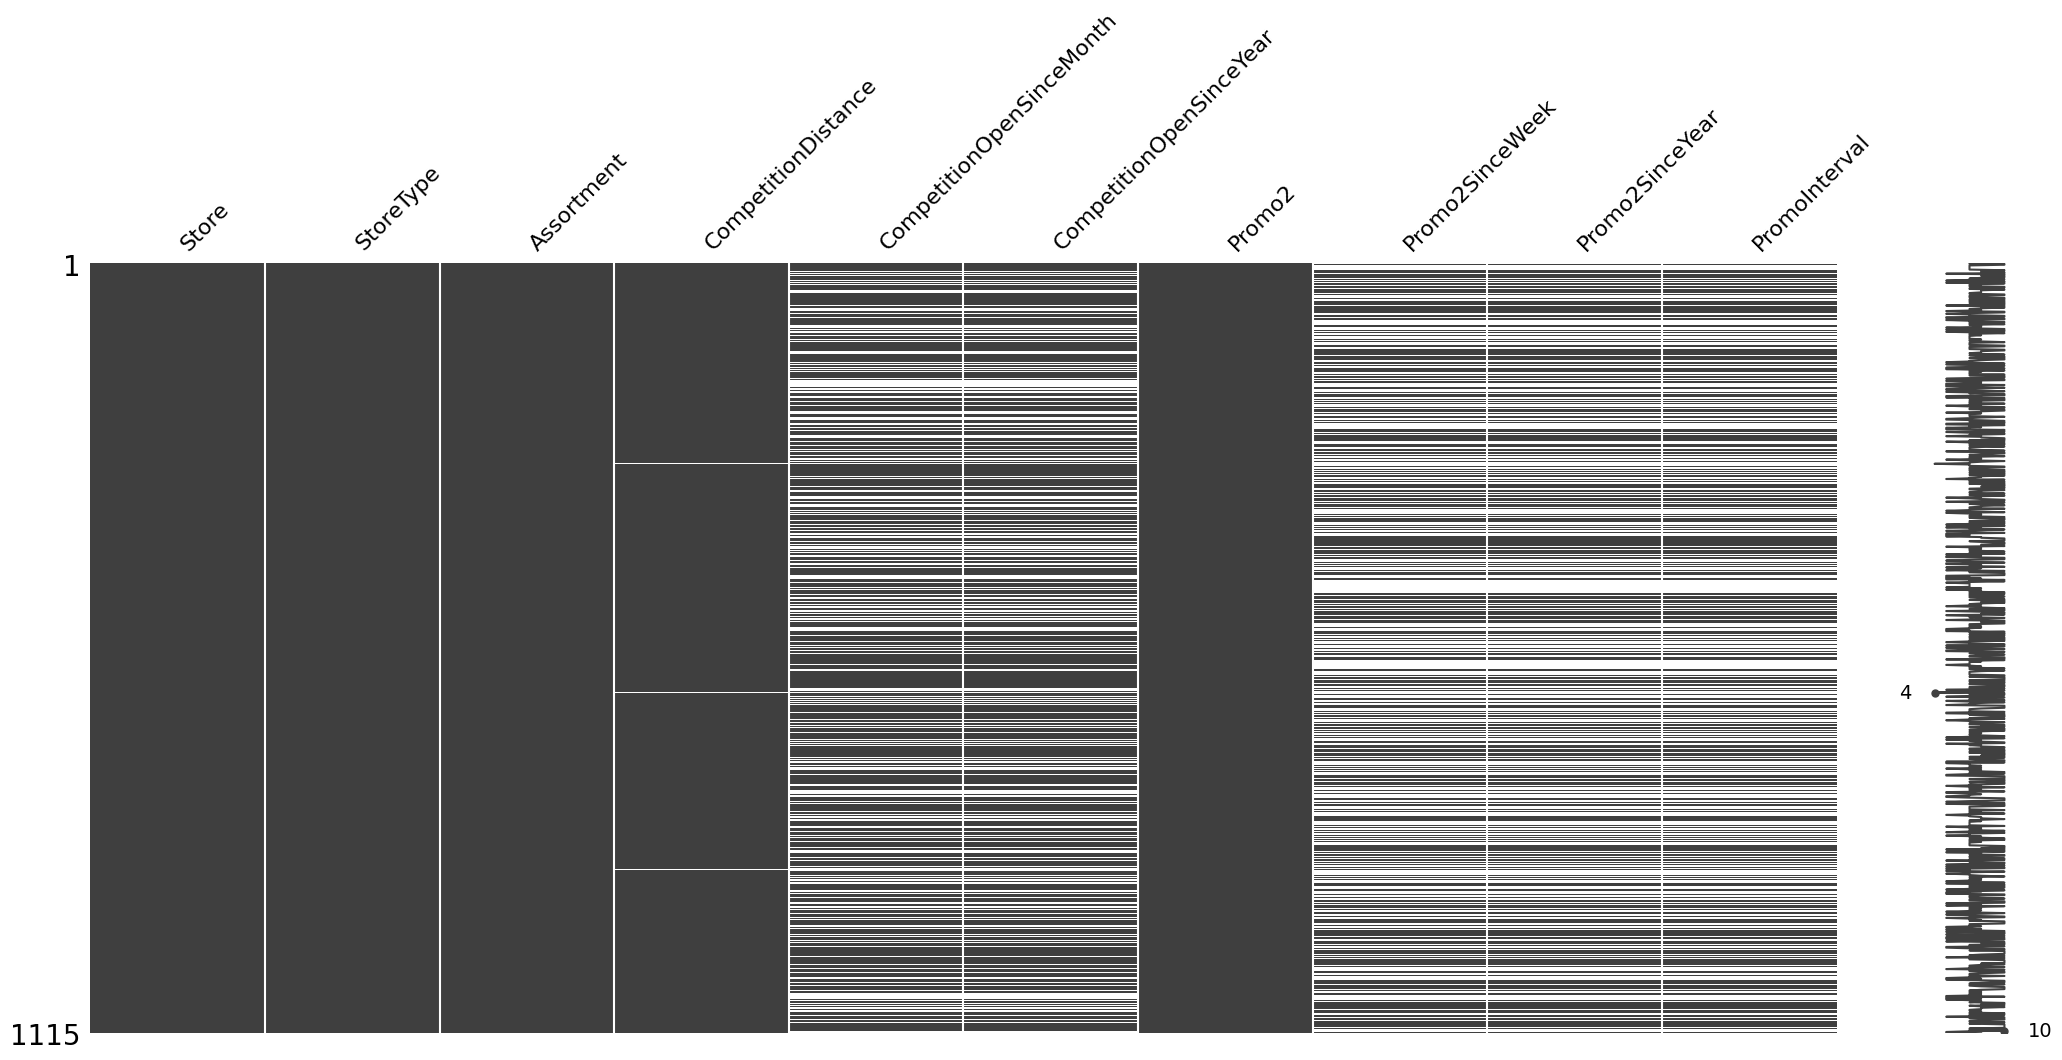

In [ ]:

# Visualize  the missing values
msno.matrix(store)

<Axes: >

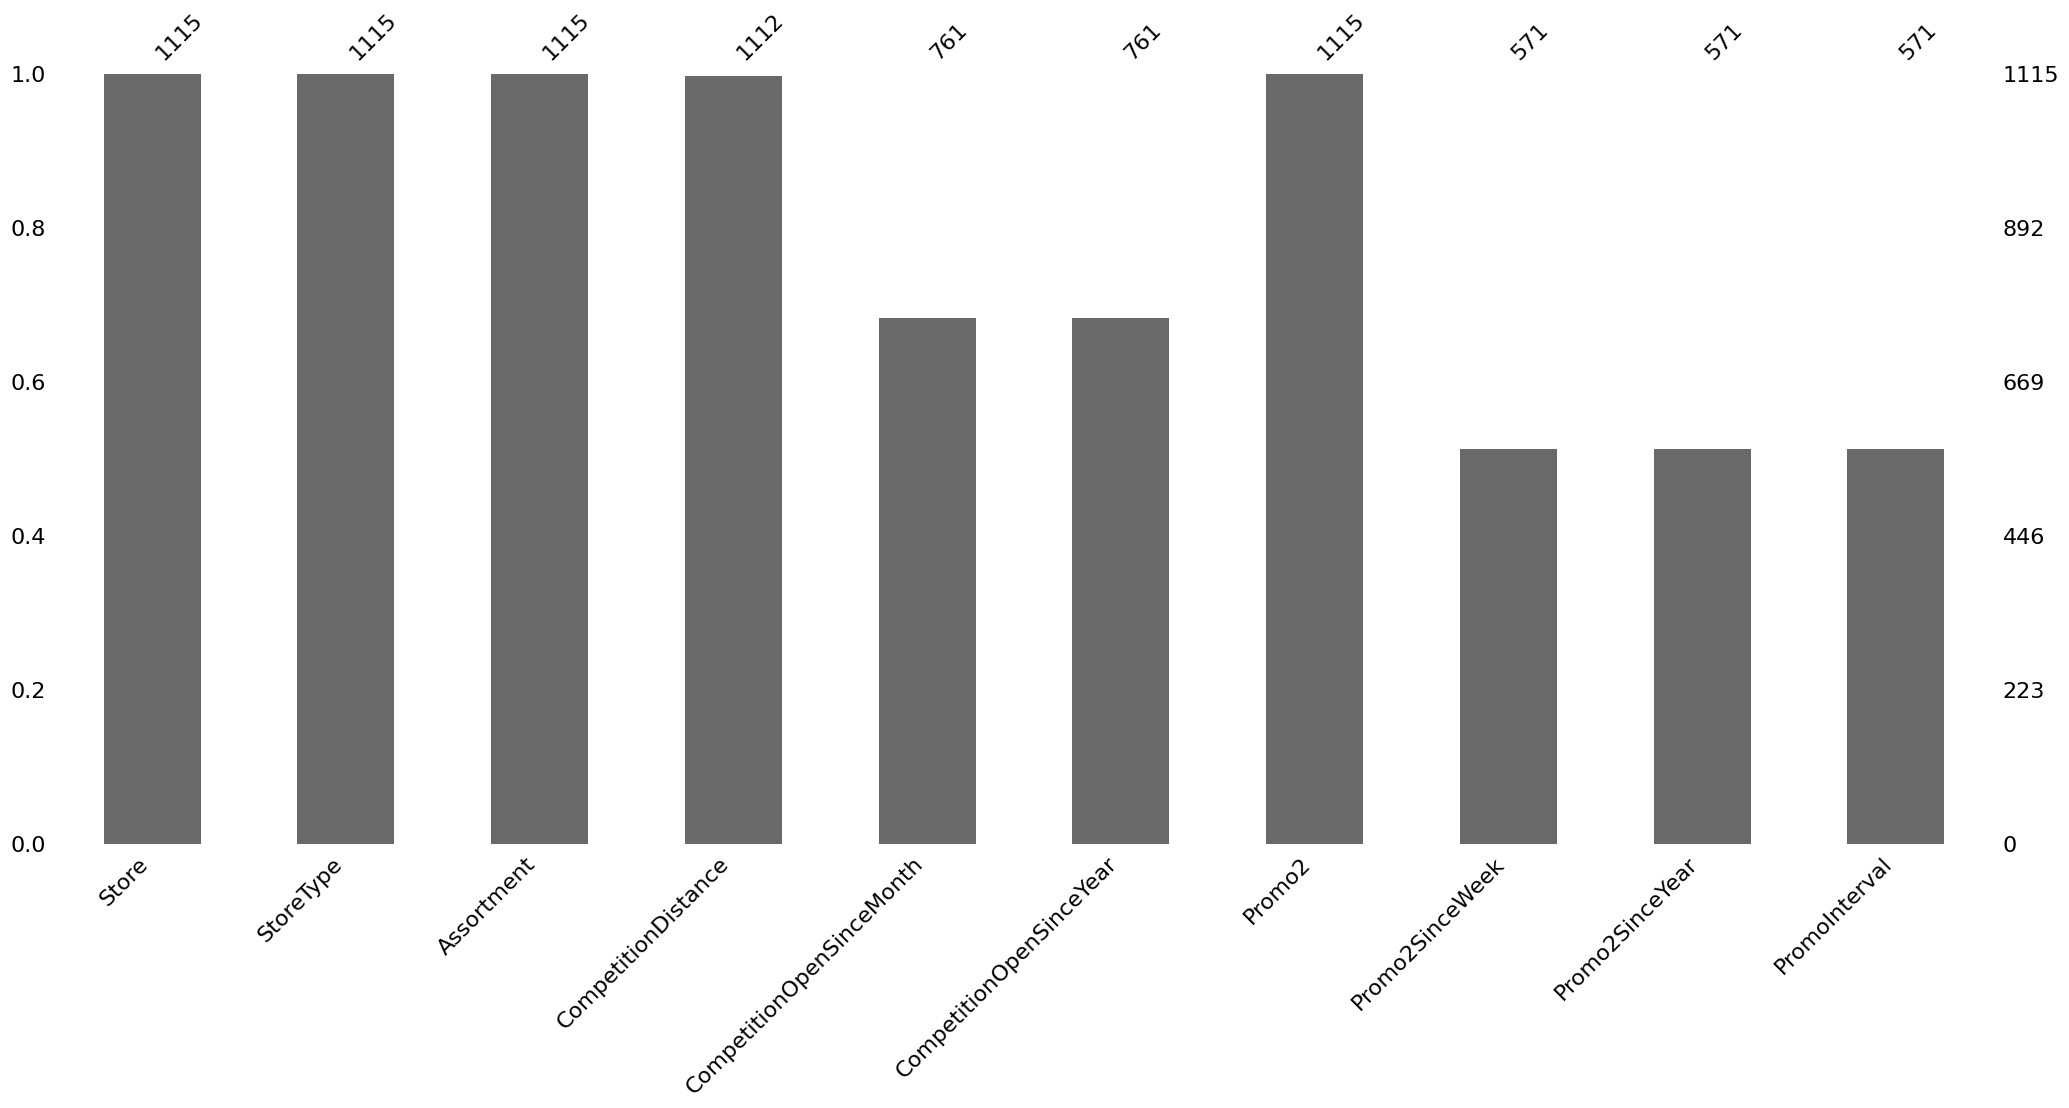

In [ ]:
# visualizes missing values using bar chart.
msno.bar(store)

What did you know about your dataset?
We have a Dataset of Rossmann Stores which contain 1017209 rows and 18 colums. Some columns have missing values.

 * CompetitionDistance have 3 null Values

*   CompetitionOpenSinceMonth and CompetitionOpenSinceYear have 354 null values.

*  Promo2SinceWeek ,Promo2SinceYear and PromoInterval have 544 null values.


**2. Understanding Your Variables**

Dataset Columns

In [ ]:

# check which how many types of columns in our rossmann data set
rossmann.keys()

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# check which how many types of columns in our store data set
store.keys()

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


Dataset Describe
     

In [ ]:
# check how many numeric values in our rossmann data set.
rossmann.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Check how many numeric value in our store data set.
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


**Variables Description**

**Rossmann Stores Data.csv** - historical data including Sales

**Store.csv** - supplemental information about the stores

Data Fields

1. Id - an Id that represents a (Store, Date) duple within the test set

2. Store - a unique Id for each store

3. Sales - the turnover for any given day (this is what you are predicting)

4. Customers - the number of customers on a given day

5. Open - an indicator for whether the store was open: 0 = closed, 1 = open

6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

8. StoreType - differentiates between 4 different store models: a, b, c, d

9. Assortment - describes an assortment level: a = basic, b = extra, c = extended

10. CompetitionDistance - distance in meters to the nearest competitor store

11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

12. Promo - indicates whether a store is running a promo on that day

13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

14. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variabl of rosmann data sate.
for col in rossmann.columns:
  if col in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'The unique values in column {col} are',rossmann[col].unique())


The unique values in column Store are [   1    2    3 ... 1113 1114 1115]
The unique values in column DayOfWeek are [5 4 3 2 1 7 6]
The unique values in column Customers are [ 555  625  821 ... 3900   36 4065]
The unique values in column Open are [1 0]
The unique values in column Promo are [1 0]
The unique values in column StateHoliday are ['0' 'a' 'b' 'c' 0]
The unique values in column SchoolHoliday are [1 0]


In [ ]:
# Check unique values for each variables of store data set.
for col in store.columns:
  if col in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'The unique values in column {col} are',store[col].unique())


The unique values in column Store are [   1    2    3 ... 1113 1114 1115]
The unique values in column StoreType are ['c' 'a' 'd' 'b']
The unique values in column Assortment are ['a' 'c' 'b']
The unique values in column CompetitionOpenSinceMonth are [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
The unique values in column CompetitionOpenSinceYear are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
The unique values in column Promo2 are [0 1]
The unique values in column Promo2SinceWeek are [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
The unique values in column Promo2SinceYear are [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
The unique values in column PromoInterval are [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
# Check number of unique values of our data rosmmann data set.
rossmann.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [ ]:
# Check number of unique value of our store date set.
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

**3. Data Wrangling**

Data Wrangling Code

Write your code to make your dataset analysis ready.

In [ ]:
# Merge Dataset
df = pd.merge(rossmann, store, how='left', on='Store')

In [ ]:
# split the date colunmn into date , month and year.
df['year'] = df['Date'].apply(lambda x : x.split('-')[0])
df['month'] = df['Date'].apply(lambda x : x.split('-')[1])
df['date'] = df['Date'].apply(lambda x : x.split('-')[2])

In [ ]:
# delete date column
del df['date']

In [ ]:
# check how many sales in every month.
result = df.groupby(['month'],as_index=False).agg({'Sales':"sum"})
print(result)

   month      Sales
0     01  566728724
1     02  528734410
2     03  599831906
3     04  575895295
4     05  569248217
5     06  578112775
6     07  595059205
7     08  361791202
8     09  342570131
9     10  351878728
10    11  369498877
11    12  433831153


In [ ]:
# fill null values with 0
df['Promo2SinceWeek'].fillna(0, inplace = True)
df['Promo2SinceYear'].fillna(0, inplace = True)
df['PromoInterval'].fillna(0, inplace = True)

In [ ]:
# merge 0 in 0
df.loc[df['StateHoliday'] == '0' , 'StateHoliday']=0

In [ ]:
df['StateHoliday'].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07


What all manipulations have you done and insights you found?**



*   First I merges Both Data Set Rossmann or Store
*   then after merge dataset we make date, month and year separate column and drop Date Columns From Dataset
* Check Sales in a month using groupby method
* Promo2SinceWeek ,Promo2SinceYear and PromoInterval fill null value with 0
*  Stateholiday has 5 unique values 0 ,0 a, b,and c we merge both 0 make and one 0

**4.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart - 1 (Bar Chart)**

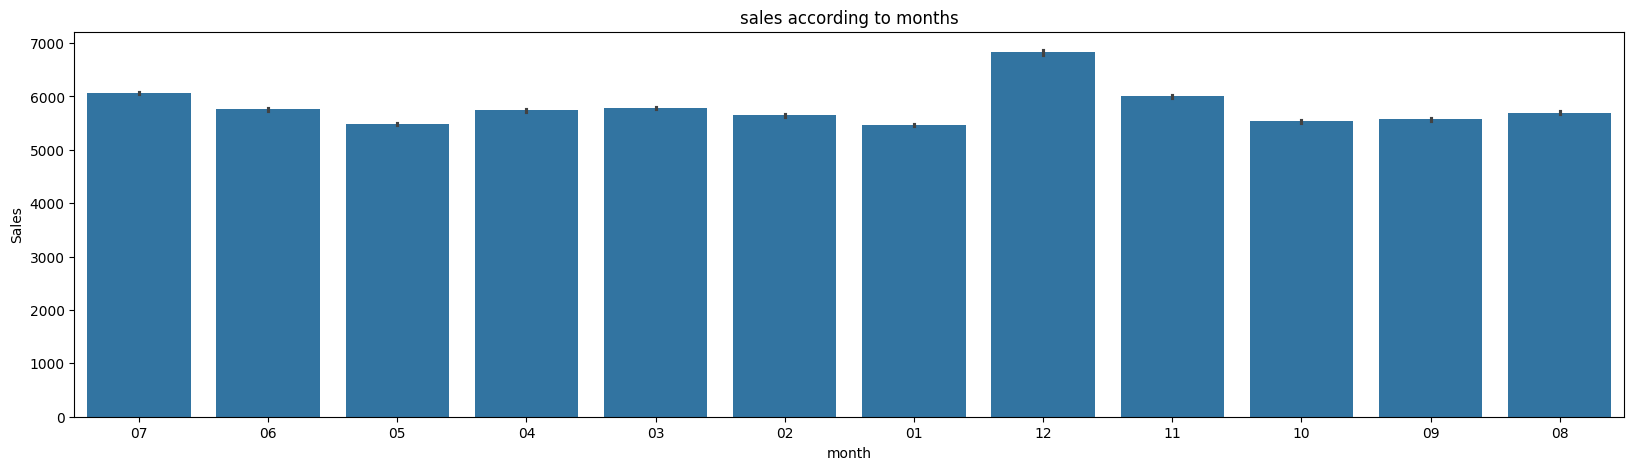

In [ ]:
# Chart - 1 visualization code
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=df , x='month' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to months')
plt.show()

**1. Why did you pick the specific chart?**

Bar chart are easy to understand and to create

**2. What is/are the insight(s) found from the chart?**

Sales are highest during three month of the year i.e.,July, November and December and least sales are during the month of May

**Chart - 2 (point plot)**

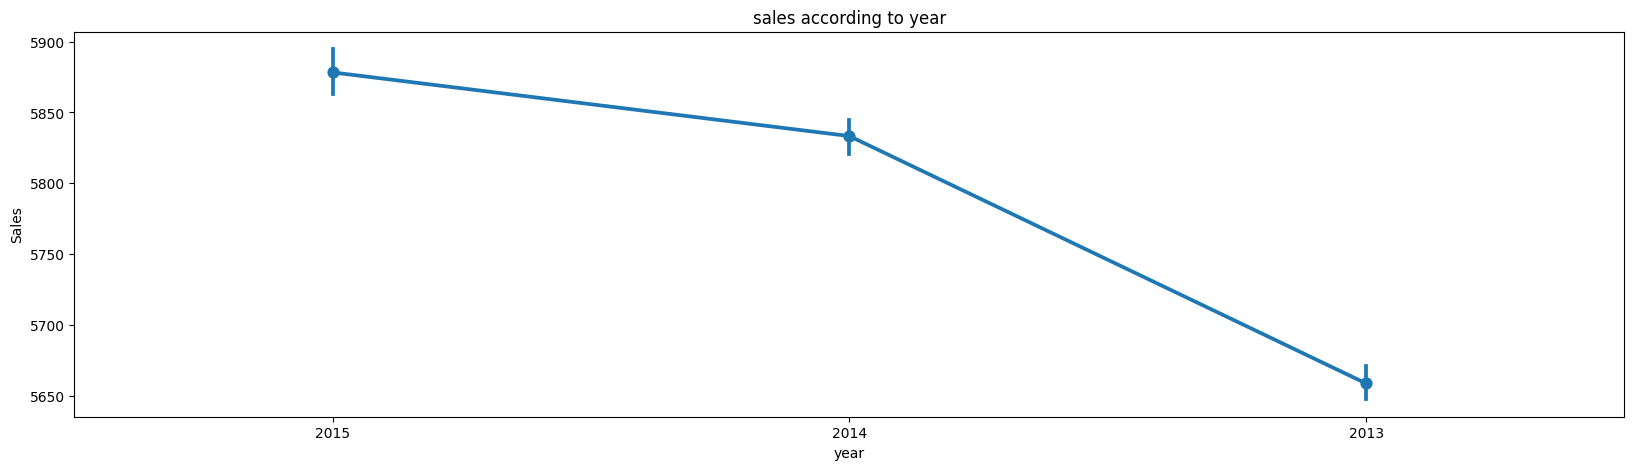

In [ ]:
#Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(20,5))
sns.pointplot(data=df , x='year' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to year')
plt.show()

1. **Why did you pick the specific chart?**

  This plotchart shows relation between years

**2.What is/are the insight(s) found from the chart?**

Sales are increasingly year by year 2013 has less sales,in 2014 Sales Up Sales bit increase in 2015.

**Chart - 3**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 2000x500 with 0 Axes>

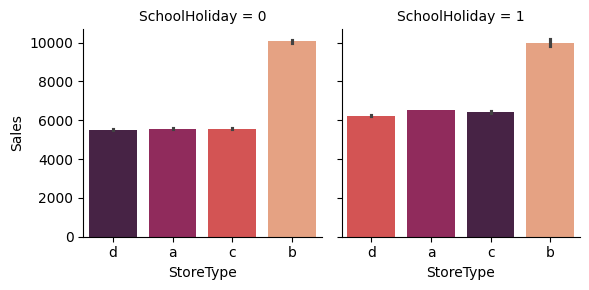

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col="SchoolHoliday")
g.map(sns.barplot, "StoreType", "Sales",palette= "rocket");
plt.show()

**1.Why did you pick the specific chart?**

Bar charts are generally used to help avoid clutter when one data label is long or if you have more than 10 items to compare

**2. What is/are the insight(s) found from the chart?**

School close = 0

School open = 1

We can say that Storetype 'd' have more Sale when Schools are closed and when School are open it have less sales as compared on holiday And vise versa for store type'b', type c & d doesn't effect much like 'b' and 'c

**Chart - 4**

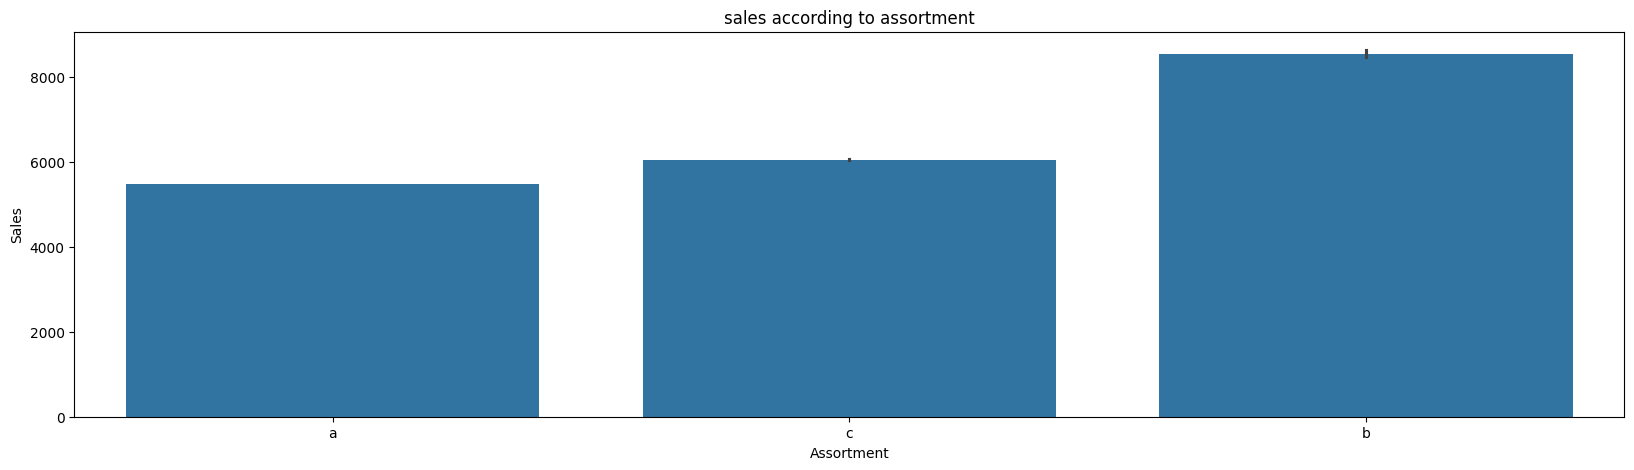

In [ ]:
#Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=df , x='Assortment' , y = 'Sales' , ax=ax )
ax.set(title = 'sales according to assortment')
plt.show()

**1. Why did you pick the specific chart?**

 Bar and column charts are used to compare different items.

**2. What is/are the insight(s) found from the chart?**

  Most of the sales of B (extra) type of assortment and sales of C assortment more than A

**3. Will the gained insights help creating a positive business impact?**

  Are there any insights that lead to negative growth? Justify with specific reason.

 As sales is highest for assortment_b so we could invest our efforts more on this rather than assortment_a and assortment_c to increase the sales

**Chart - 5 (Pie Chart)**

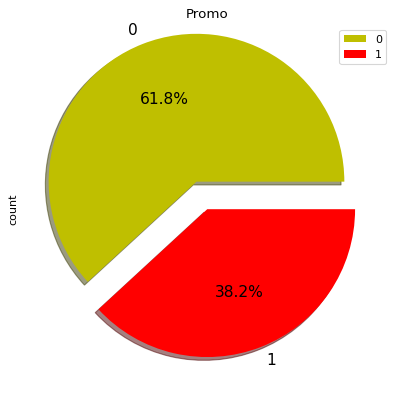

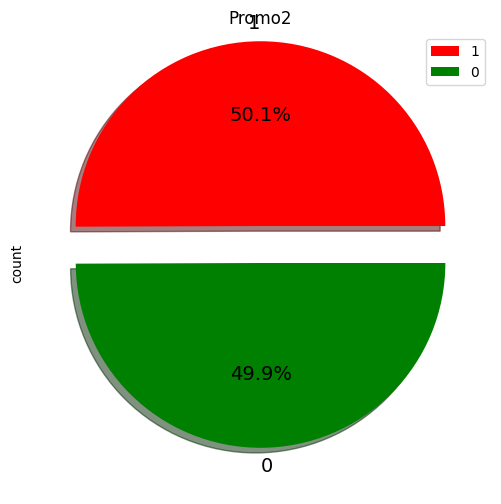

In [ ]:
#Chart - 5 visualization code
plt.figure(figsize=(12,7), dpi=80)

labels = 'Not Promo','Promo'
df['Promo'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.2, 0.0), colors = ['y','red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
plt.title("Promo")
fig=plt.gcf()
plt.legend(loc="best")
fig.set_size_inches(6,6)
plt.show()

df['Promo2'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.2, 0.0),colors = ['red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
label= 'Not Promo','Promo'
plt.title("Promo2")
fig=plt.gcf()
plt.legend(loc="best")
fig.set_size_inches(6,6)


**1. Why did you pick the specific chart?**

 A pie chart represents numbers in percentages, and the total sum of all the divided segments equals 100 percent

**2. What is/are the insight(s) found from the chart?**

 In promo - 61.8 % running stores are not participating in promo.

 In promo 2 - only 50.1 % stores are continueing participate in Promo.

**3. Will the gained insights help creating a positive business impact?**

 Are there any insights that lead to negative growth? Justify with specific reason.

 If Stores are participating in Promo Sales will increase further.

**Chart - 6 (Bar plot)**

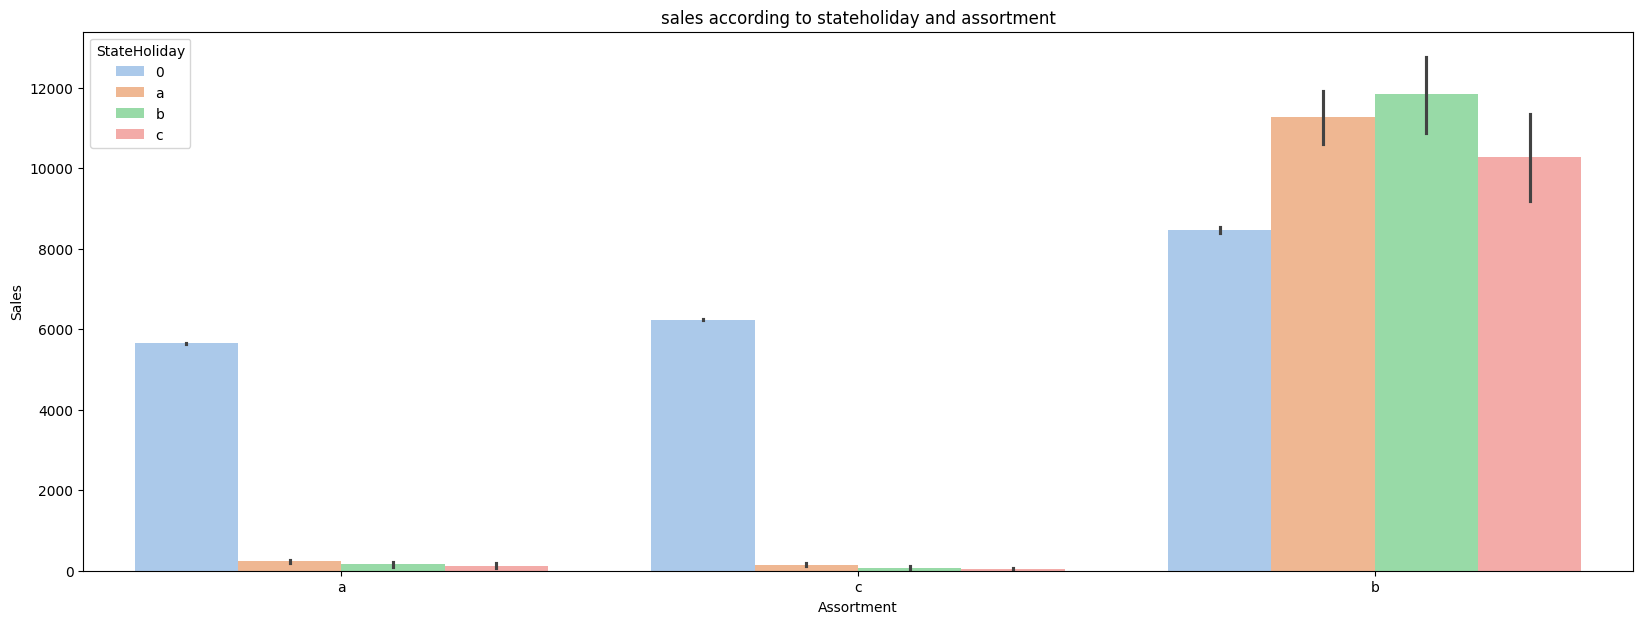

In [ ]:
#Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(data=df , x='Assortment' , y = 'Sales' ,hue = 'StateHoliday' , ax=ax , palette = 'pastel')
ax.set(title = 'sales according to stateholiday and assortment')
plt.show()

**1. Why did you pick the specific chart?**

 We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

**2. What is/are the insight(s) found from the chart?**

 Sales are maximum during the Public Holidays, where are during the religious occassions, like Easter or Christmas, the sales are lower , most of sales of B type assortment of all Holiday.

**3. Will the gained insights help creating a positive business impact?**

 Are there any insights that lead to negative growth? Justify with specific reason.

 The business can create special offers or bundle products to increase the sales during the religious festivals, or they can decide to remain close during these festivals to reduce running cost or expenses.

**Chart - 7**

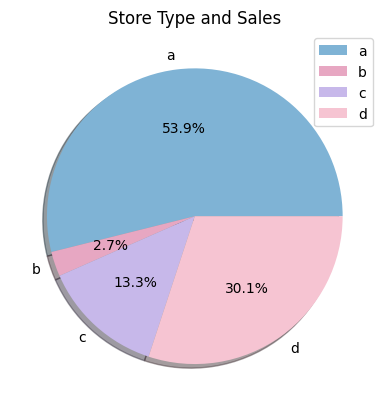

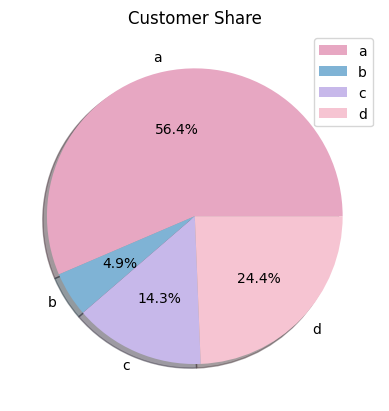

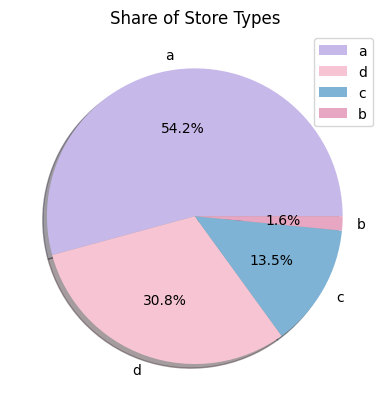

In [ ]:
# Chart - 7 visualization code
# Sum of sales by store type
sales_by_store_type = df.groupby("StoreType")["Sales"].sum()

# Plotting pie chart of sales by store type
fig, ax = plt.subplots()
ax.pie(sales_by_store_type, labels=sales_by_store_type.index, autopct='%1.1f%%', shadow=True, colors=['#7FB3D5', '#E7A7C2', '#C7B8EA', '#F6C4D2'])
ax.set_title('Store Type and Sales')
plt.legend()
plt.show()

# Sum of customers by store type
customers_by_store_type = df.groupby("StoreType")["Customers"].sum()

# Plotting pie chart of customers by store type
fig, ax = plt.subplots()
ax.pie(customers_by_store_type, labels=customers_by_store_type.index, autopct='%1.1f%%', shadow=True, colors=['#E7A7C2', '#7FB3D5', '#C7B8EA', '#F6C4D2'])
ax.set_title('Customer Share')
plt.legend()
plt.show()

# Count of store types in the dataset
store_types = df["StoreType"].value_counts()

# Plotting pie chart of store types in the dataset
fig, ax = plt.subplots()
ax.pie(store_types, labels=store_types.index, autopct='%1.1f%%', shadow=True, colors=['#C7B8EA', '#F6C4D2', '#7FB3D5', '#E7A7C2'])
ax.set_title('Share of Store Types')
plt.legend()
plt.show()


**1. Why did you pick the specific chart?**

 A pie chart represents numbers in percentages, and the total sum of all the divided segments equals 100 percent

**2. What is/are the insight(s) found from the chart?**

 As my observation there are 4 types of stores A ,B, C and D

 But upon further exploration it can be clearly observed that the highest sales belonged to the store type A due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share

 A bar plot is a visualization tool that shows an estimate of central tendency for a numeric variable using the height of each rectangle. Initially, the bar plot showed that store type b had the highest sales on average, indicating it as the most profitable store type. Further exploration revealed that store type a had the highest sales due to its high representation in the dataset, while store types a and c had similar sales and customer shares. Interestingly, store type b had the highest average sales and per store revenue generation, which may be attributed to its use of all three assortment strategies, as observed earlier.

**3. Will the gained insights help creating a positive business impact?**

 Are there any insights that lead to negative growth? Justify with specific reason.

 Increase number of stores like b , c, and also d type stores only A type of stores spread everywhere

**Chart - 8**

Text(0.5, 1.0, 'Store Daily Promo Countplot')

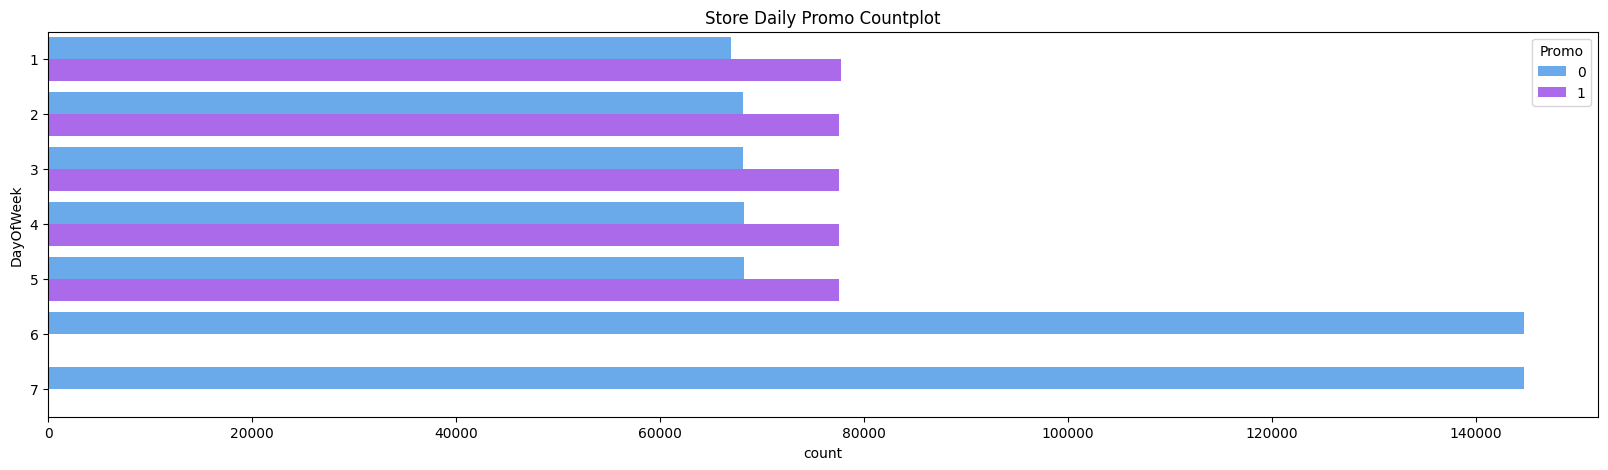

In [ ]:
#Chart - 8 visualization code
plt.figure(figsize = (20,5))
sns.countplot(y= 'DayOfWeek', hue='Promo', data= df, palette= 'cool')
plt.title('Store Daily Promo Countplot')

**1. Why did you pick the specific chart?**

 They are easy to understand and to create.

**2. What is/are the insight(s) found from the chart?**

 First 5 day of week promotion in stores,only weekend no promotion in stores

**Chart - 9**

Text(0.5, 1.0, 'according week of days store open or close')

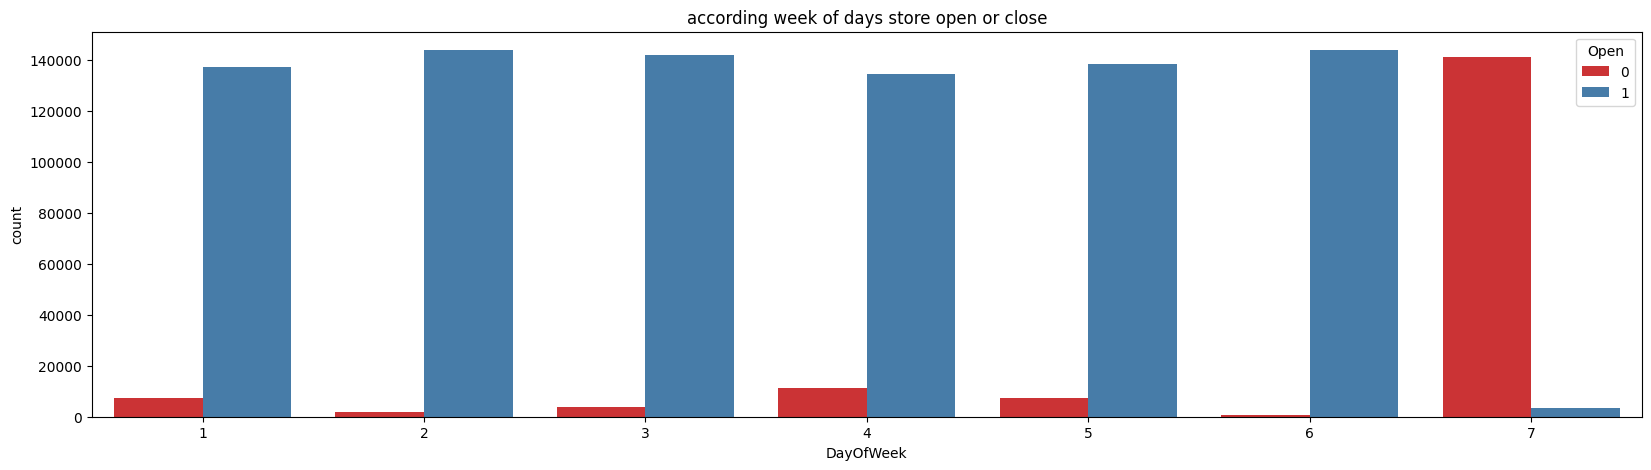

In [ ]:
#Chart - 9 visualization code
plt.figure(figsize = (20,5))
sns.countplot( x='DayOfWeek', data=df, hue="Open", palette="Set1")
plt.title('according week of days store open or close')

**1. Why did you pick the specific chart?**

 We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

**2. What is/are the insight(s) found from the chart?**

 In this barchart clear show on sunday most of the stores are closes and other day day all stores are opens.

**3. Will the gained insights help creating a positive business impact?**

 Are there any insights that lead to negative growth? Justify with specific reason.

 Most of the stores are closes on sunday if 60 % stores are open on sunday, positive impect on sales

**Chart - 10**

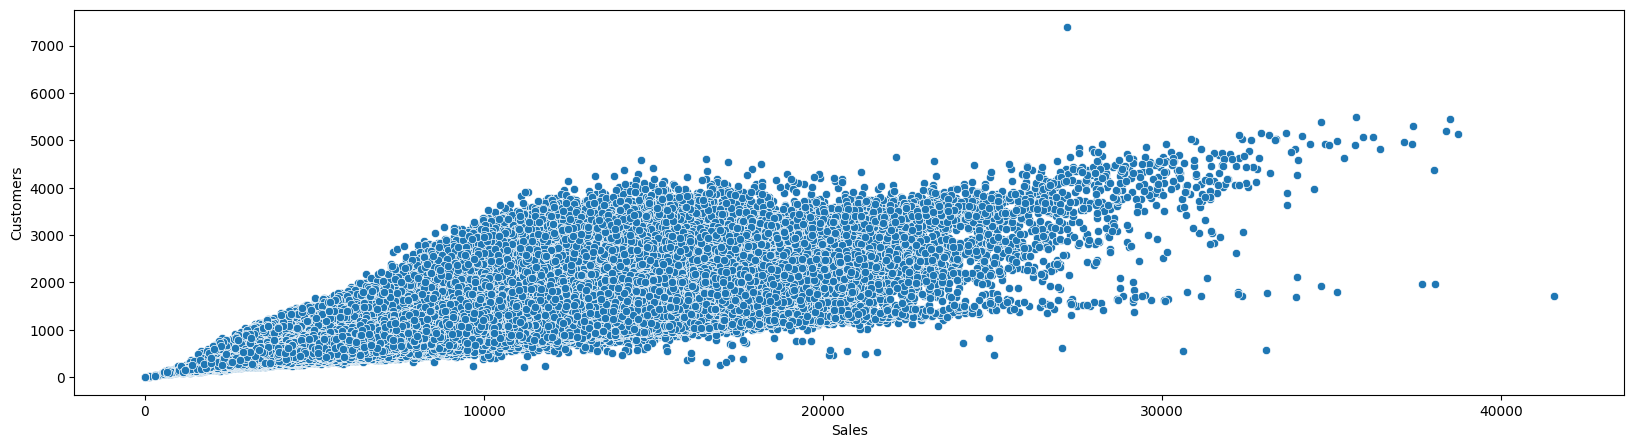

In [ ]:
#Chart - 10 visualization code
plt.figure(figsize = (20,5))
sns.scatterplot(data=df, x="Sales", y="Customers")
plt.show()

**1. Why did you pick the specific chart?**

 Here we have picked a scatter plot to know the relationship between numner of customers visitig stores and total sales

**2. What is/are the insight(s) found from the chart?**

 From the above chart it is easy to observe that the correlation between customers and sales is preety good as customers are increasing sales are also healing upside.

**3. Will the gained insights help creating a positive business impact?**

 Are there any insights that lead to negative growth? Justify with specific reason.

 According to our graph customers and sales are highly correlated with each other which from the business point of view it is too good.

 **Chart - 11**

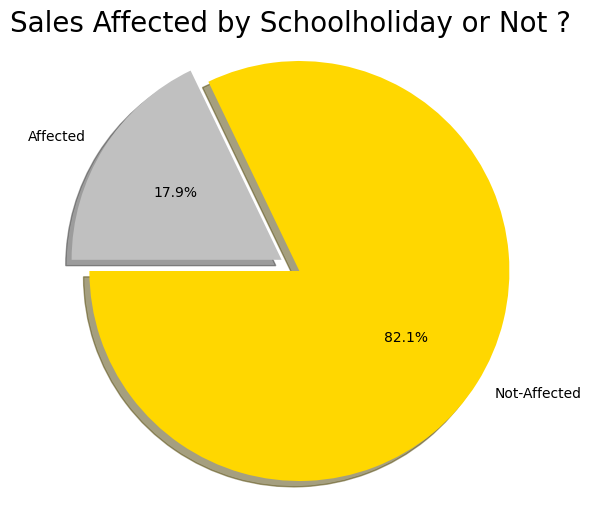

In [ ]:
#Chart - 11 visualization code
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**1. Why did you pick the specific chart?**

 We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

**2. What is/are the insight(s) found from the chart?**

School holiday 17.9 % effect on sales and 82.1% not effected on sales.

**Chart - 12**

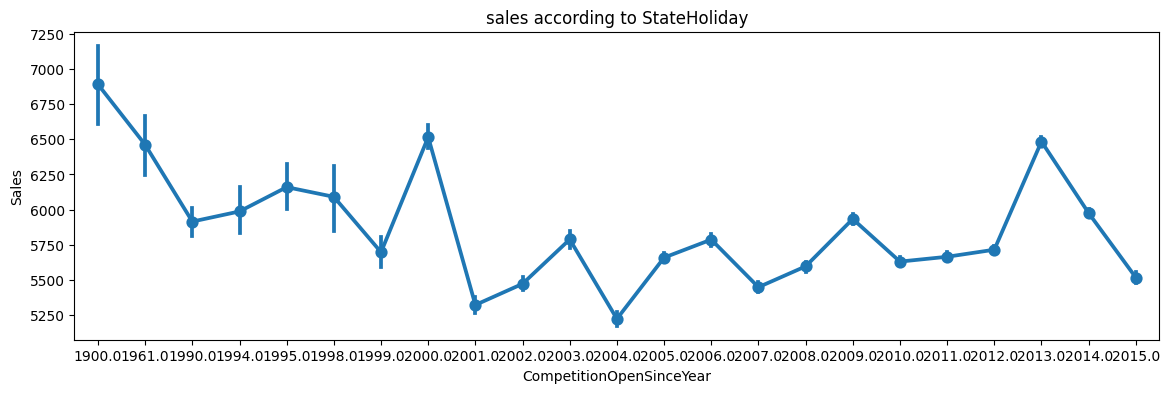

In [ ]:
#Chart - 12 visualization code
fig,ax=plt.subplots(figsize=(14,4))
sns.pointplot(data=df , x='CompetitionOpenSinceYear' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to StateHoliday')
plt.show()

**1. Why did you pick the specific chart?**
We picked this chart to know about the sales every year as there is competitor near the store.

**2. What is/are the insight(s) found from the chart?**
From the graph it is clear that from year 1900 to 2000 sales was in good state but from 2000 there is downfall in sales. It might be due to less competitor during 1900 but gradually competitor increases and sales got affected

**3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph we can observe that there is sudden increase and decrease in sales throughout the years. stores should grip some good and more effective strategy to increase the sales as more competitors are making more difficulties for the stores.

**Chart - 13**

In [ ]:
# Chart - 13 visualization code
numerical_values = list(df.describe().columns)
numerical_values

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

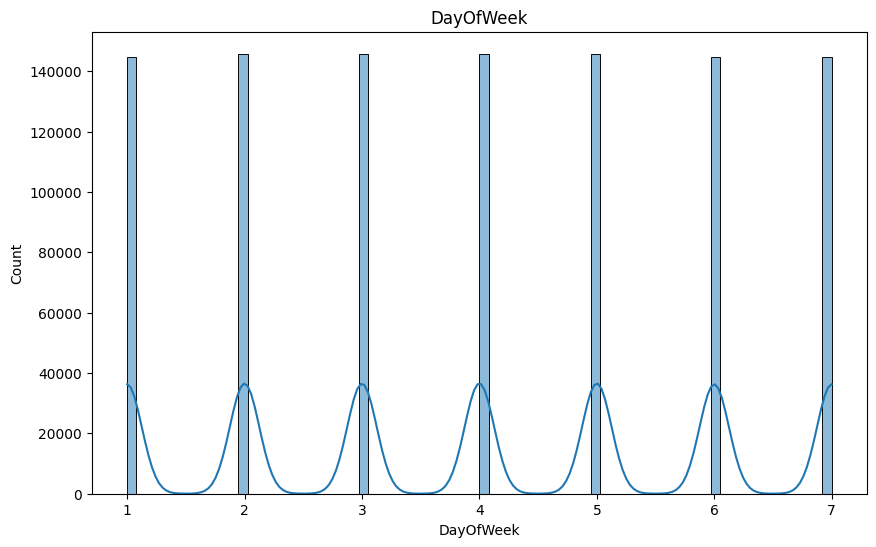

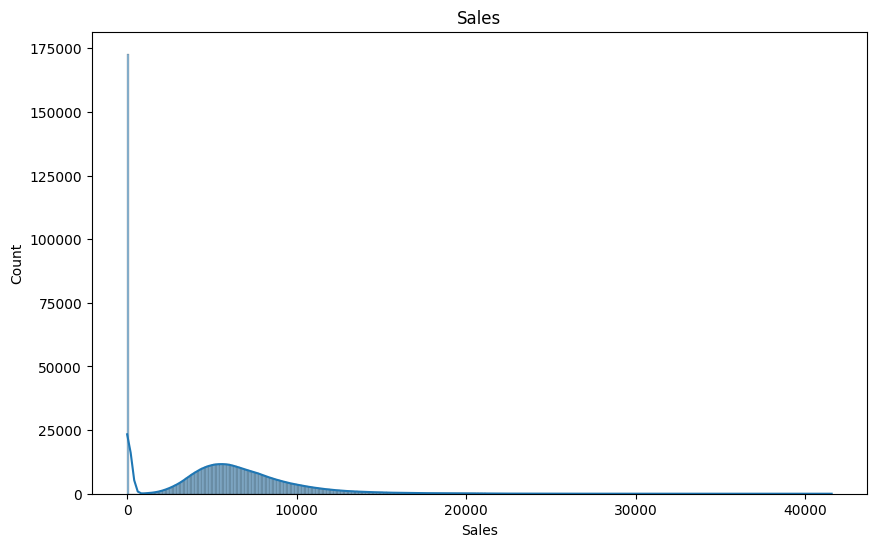

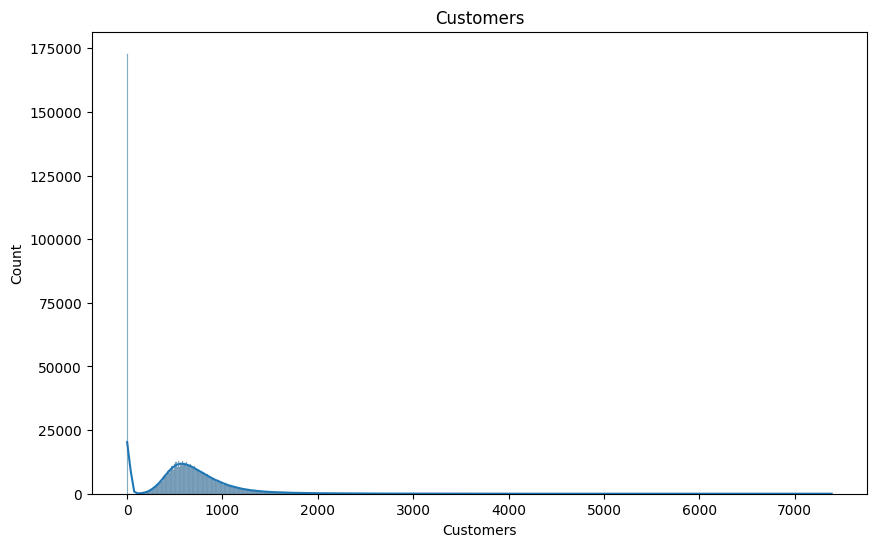

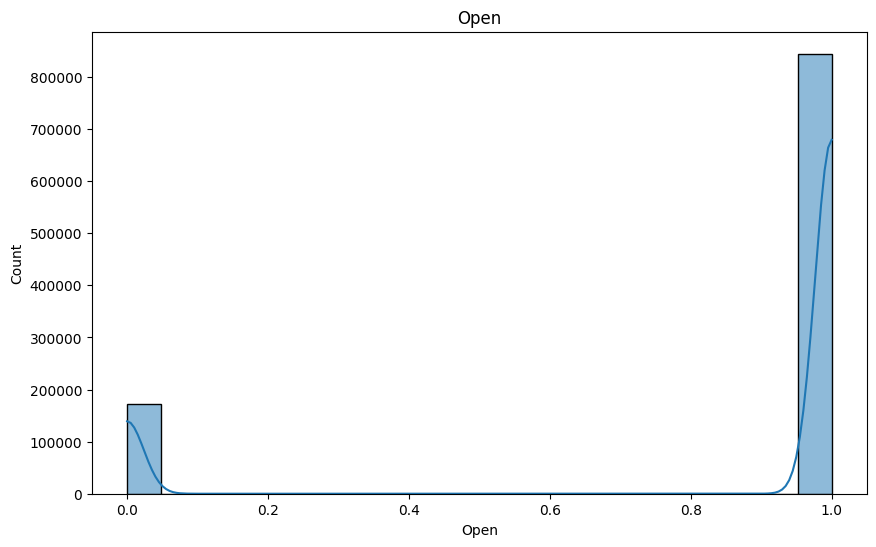

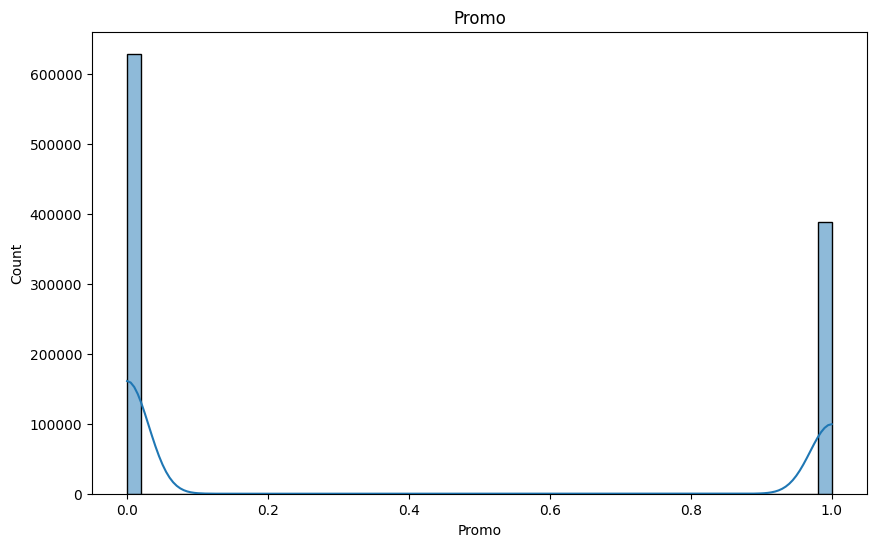

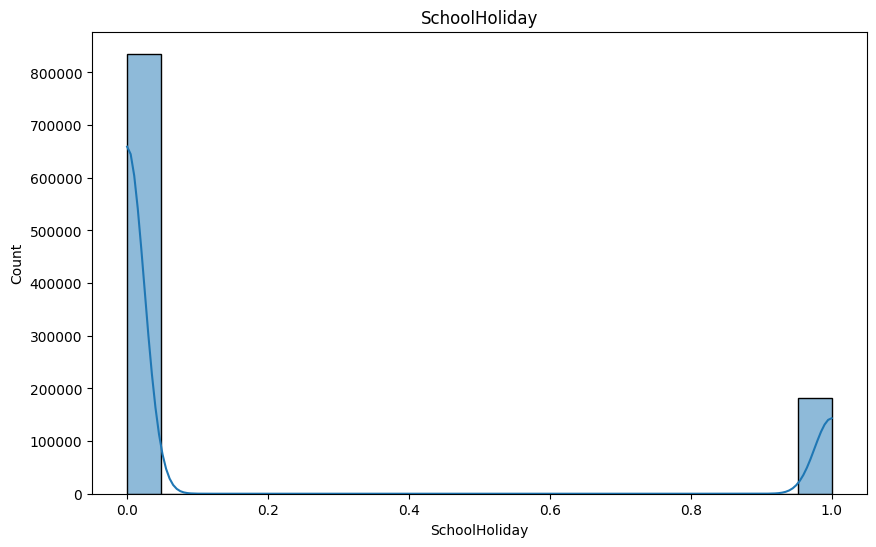

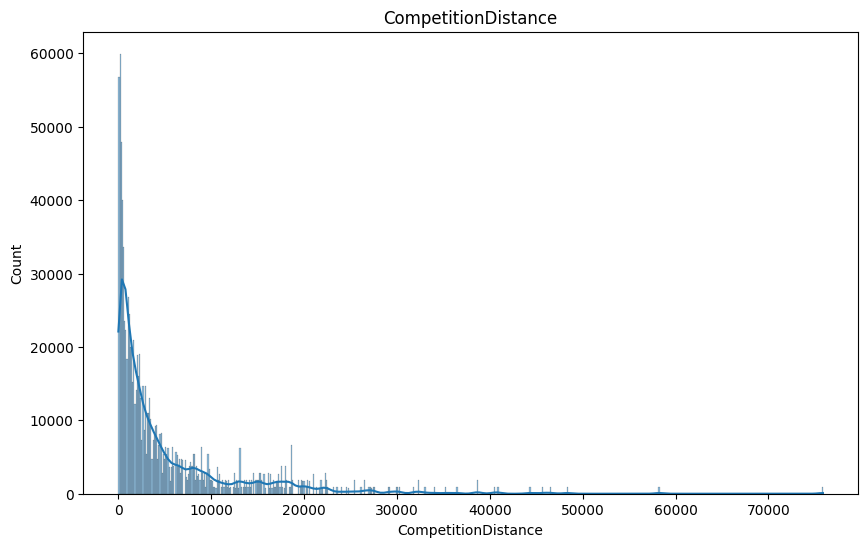

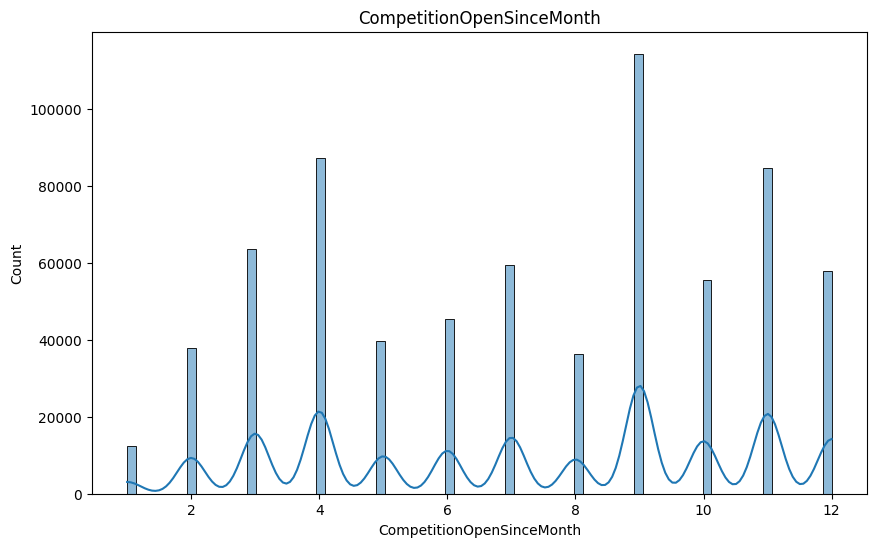

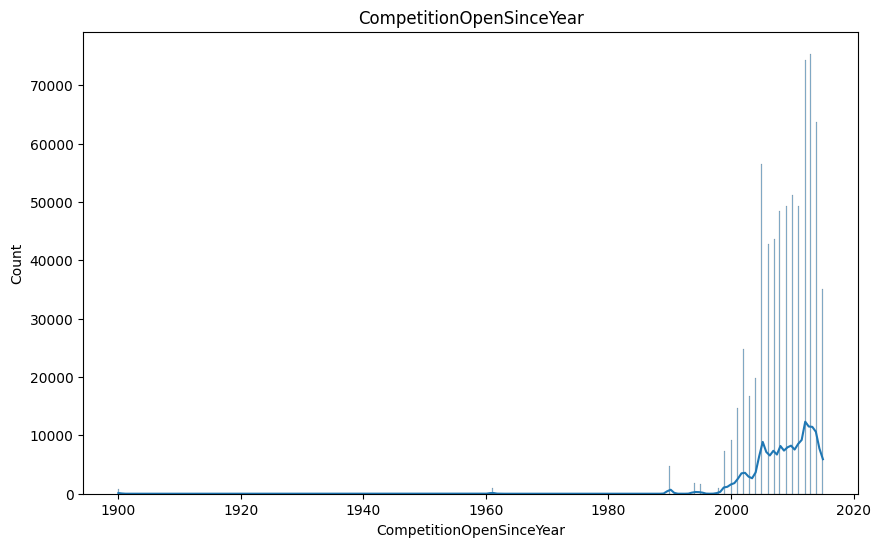

In [ ]:
for col in numerical_values[1:-3]:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  feature = df[col]
  sns.histplot(feature, ax = ax, kde=True)
  ax.set_title(col)
plt.show()


**2. What is/are the insight(s) found from the chart?**

now we can see that some of our features like CompititionDistance now more look like normal distribution. rest of our feature still not normaly distributed some of feature has multi mode. beacuse of some features have catagorical values like 1,0.

**Chart - 14 - Correlation Heatmap**

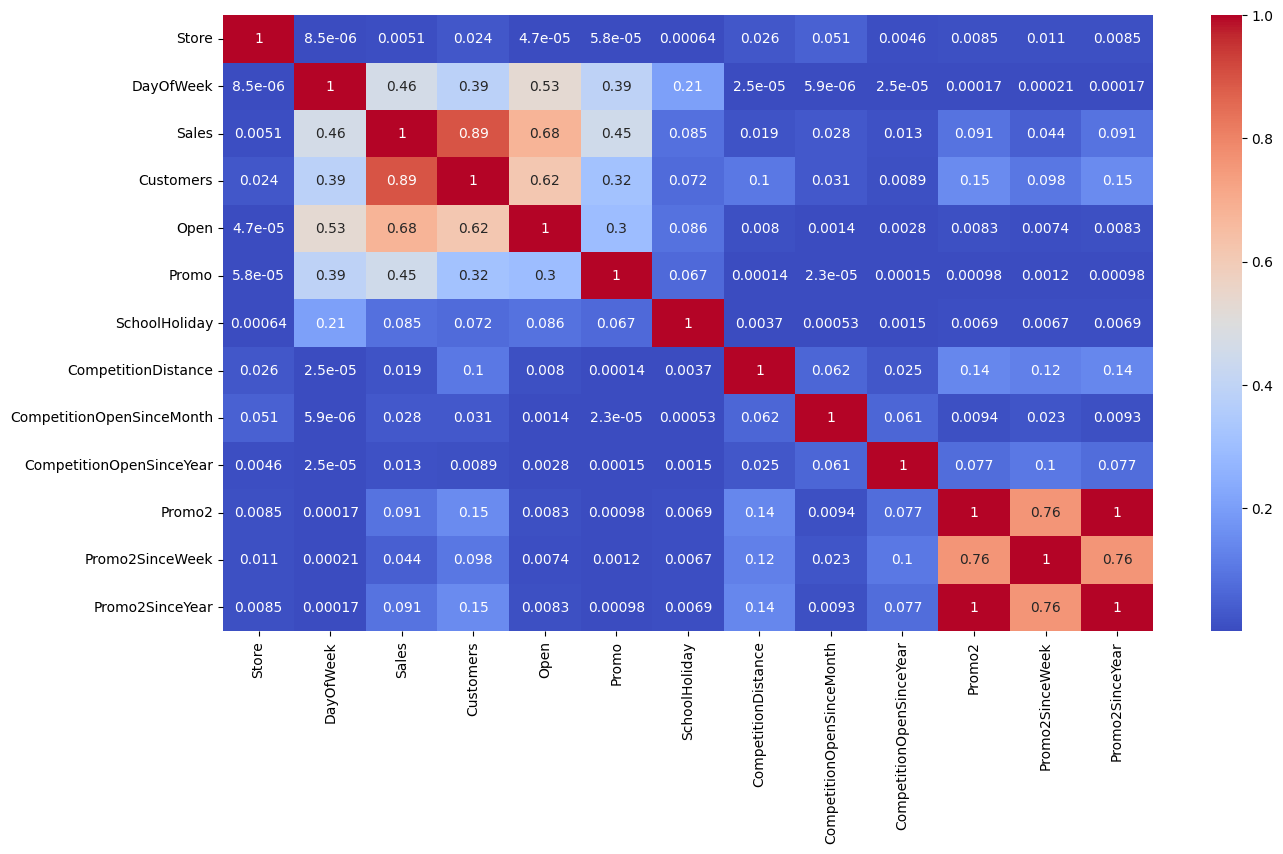

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
numeric_df = df.select_dtypes(include=[float, int])
correlation = numeric_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

**1. Why did you pick the specific chart?**

Heatmap Show correlation between each Variables.

**Chart - 15 - Pair Plot**

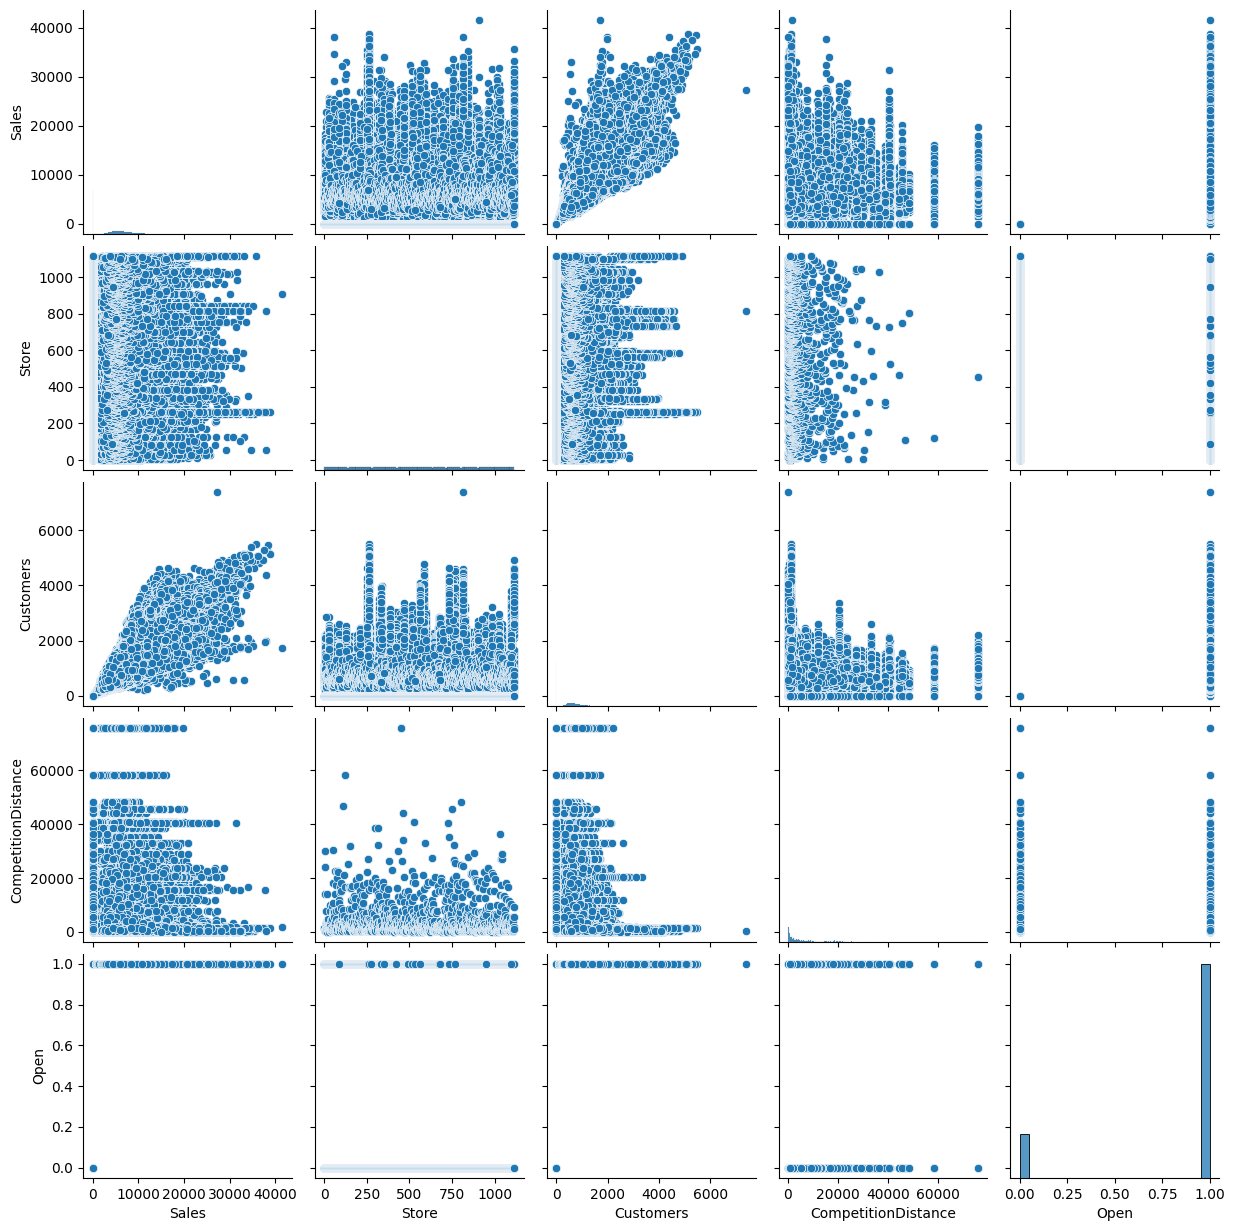

In [ ]:
# Pair Plot visualization code
Plot=df[['Sales','Store', 'Customers','CompetitionDistance', 'Open']]
sns.pairplot(Plot)
plt.show()

**1. Why did you pick the specific chart?**

We picked this specific chart to plot for multiple visuals and various insights related to the data in a single frame.

**2. What is/are the insight(s) found from the chart?**

This Pairplot helps us to visualise the realtionship of five variable with the sales , store,like variable customer is establishing high correlation with the sales. and many more visualization in a single look.

#**6. Feature Engineering & Data Pre-processing**

**1. Handling Missing Values**

In [ ]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
year                              0
month                             0
dtype: int64

In [ ]:
# Check the null values
print(df['CompetitionDistance'].isna().sum())
print(df['CompetitionOpenSinceMonth'].isna().sum())
print(df['CompetitionOpenSinceYear'].isna().sum())

2642
323348
323348


In [ ]:
# Handling Missing Values & Missing Value Imputation
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# Drop Some Columns
df.drop(['Promo2SinceWeek' ,'Promo2SinceYear' , 'PromoInterval'], axis = 1 , inplace = True)

In [ ]:
# Recheck the null values
df.isnull().sum()


Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
year                         0
month                        0
dtype: int64

In [ ]:
# Check information of data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

What all missing value imputation techniques have you used and why did you use those techniques?

* We may have to drop these last 3 columns, Promo2SinceWeek, Promo2SinceYear, PromoInterval because they have around 50% of null values, but these null values shows that stores are not actually participating in promo2 that's why there are null values, so we have to replace it with 0

* To treat the missing values we have replaced those values using median and mode

2. Handling Outliers

In [ ]:
# Name the Countinuous Variables
continuous_value_column = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'DayOfWeek',]


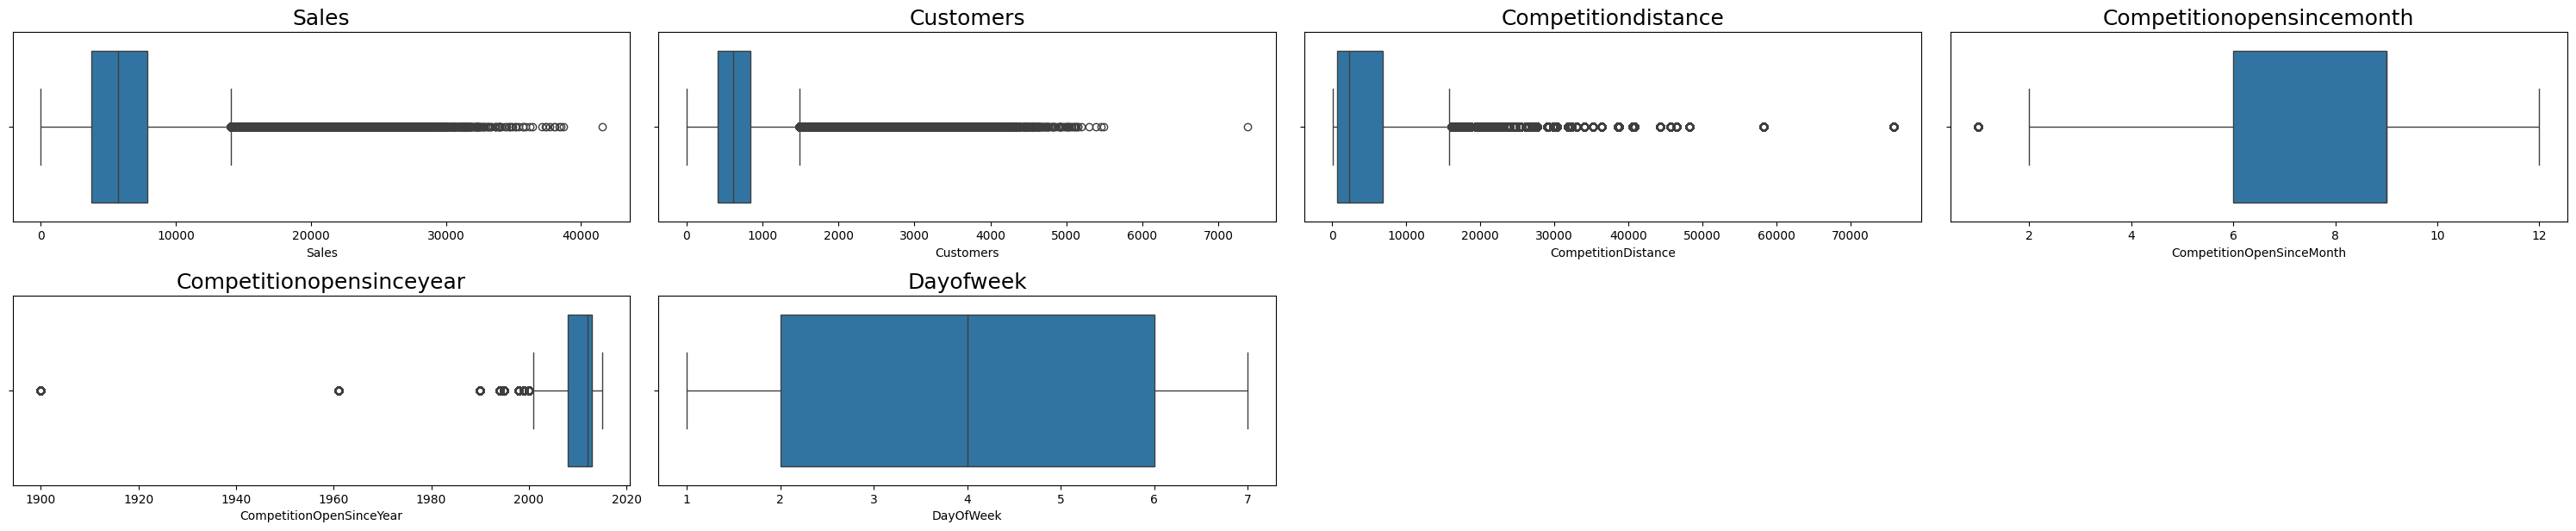

In [ ]:
# Check the outlier with boxplot
plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_value_column):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = df).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()



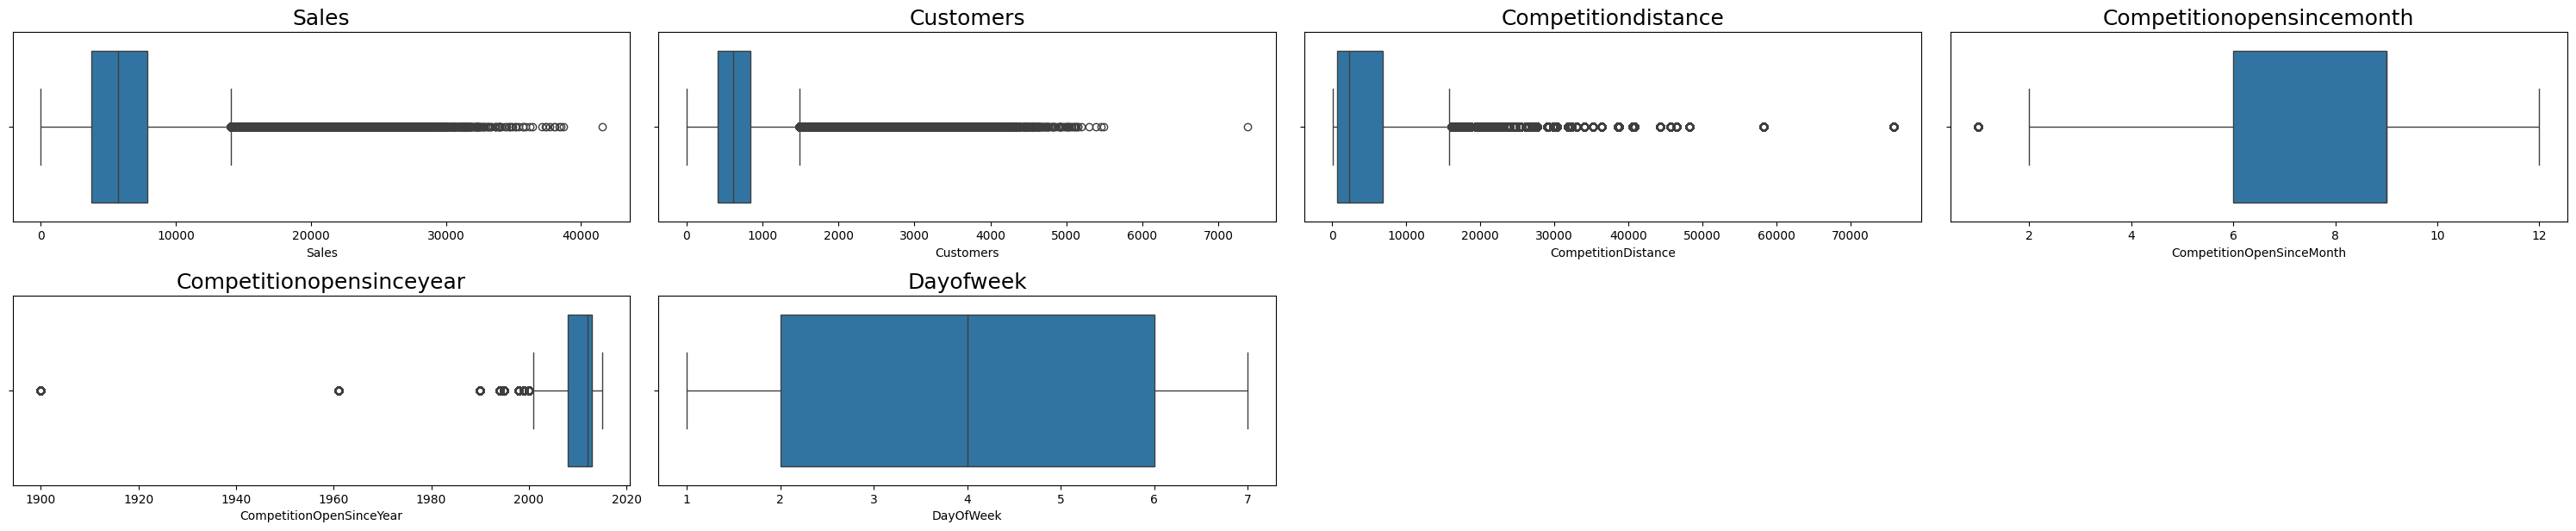

In [ ]:
# Check the outlier with boxplot
plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_value_column):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = df).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()



In [ ]:
# IQR Technique to treat outliers
def iqr2_treat_outliers(data):
  # now calculating first and last quartile
  q1,q3 = np.percentile(data, [25,75])
  # now calculating interquartile range
  IQR = q3-q1
  # now the bounds
  lower_bound = q1-(1.5*IQR)
  upper_bound = q3+(1.5*IQR)
  # now the outliers
  treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]

  return iqr2_treat_outliers


In [ ]:
for column in continuous_value_column:
  df[column] = iqr2_treat_outliers(df[column])

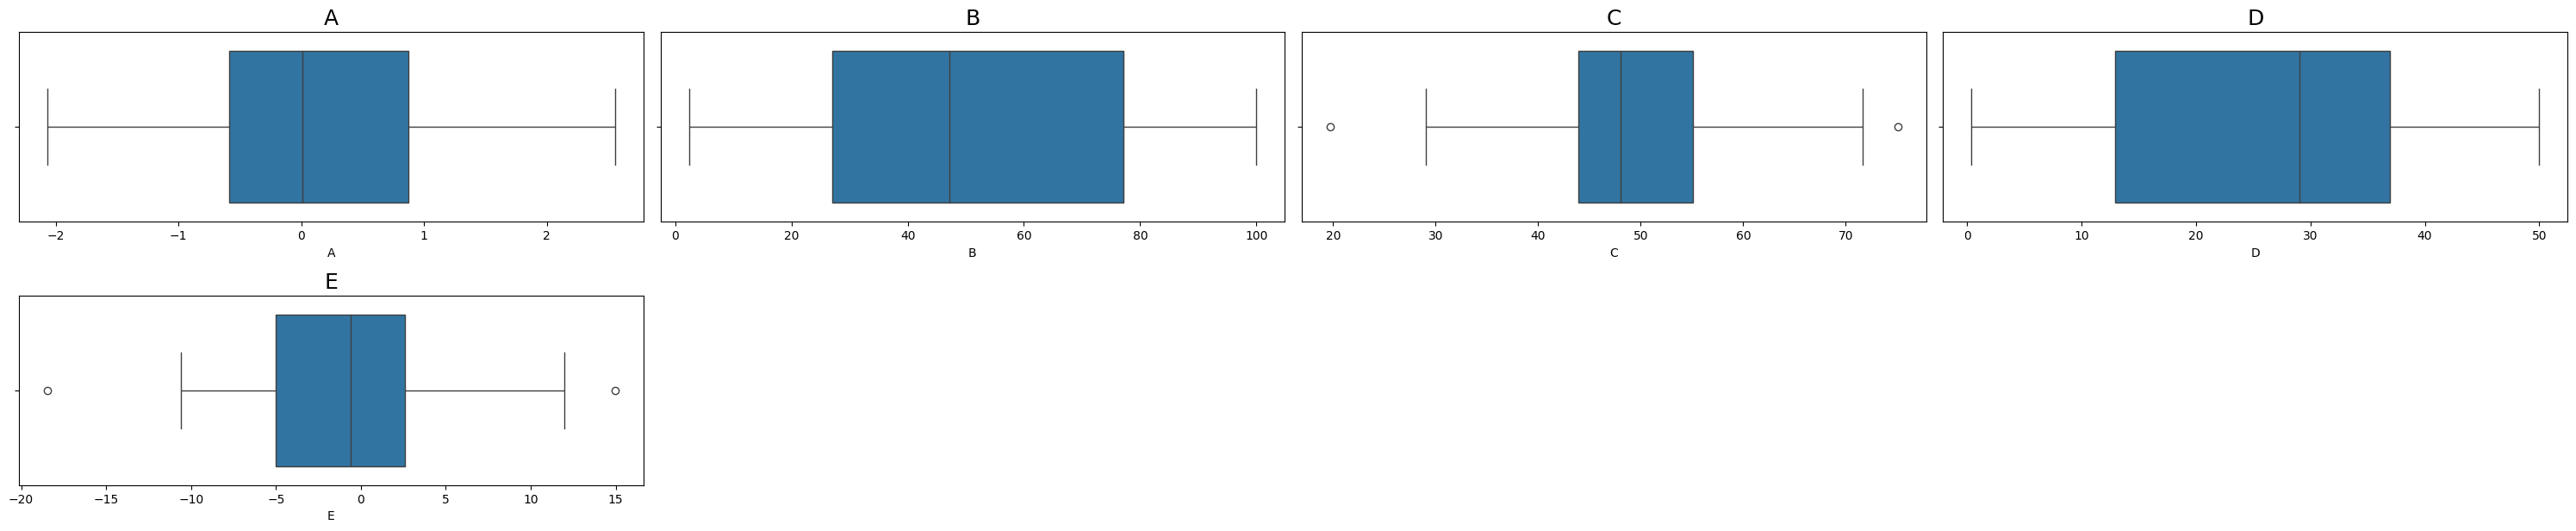

In [ ]:


# Example DataFrame
# Replace this with your actual DataFrame
df = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.rand(100) * 100,
    'C': np.random.randn(100) * 10 + 50,
    'D': np.random.rand(100) * 50,
    'E': np.random.randn(100) * 5,
    'F': ['2015-07-31'] * 100  # Example non-numeric column
})

# List of columns to plot
continuous_value_column = ['A', 'B', 'C', 'D', 'E', 'F']  # Ensure these are correct

# Filter out non-numeric columns if any
numeric_columns = [col for col in continuous_value_column if pd.api.types.is_numeric_dtype(df[col])]

# Create the figure
plt.figure(figsize=(30, 15))

# Loop through each numeric variable column
for n, column in enumerate(numeric_columns):
    plt.subplot(5, 4, n + 1)  # Create subplots in a 5x4 grid
    sns.boxplot(x=column, data=df).set_title(f'{column.title()}', fontsize=18)  # Create a boxplot with a title
    plt.tight_layout()  # Adjust subplot parameters to give specified padding

# Display the plot
plt.show()


What all outlier treatment techniques have you used and why did you use those techniques?
We used IQR Techniques to treat the outliers Because IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts.

# **3. Categorical Encoding**

In [ ]:
# Encode your categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       100 non-null    float64
 1   B       100 non-null    float64
 2   C       100 non-null    float64
 3   D       100 non-null    float64
 4   E       100 non-null    float64
 5   F       100 non-null    object 
dtypes: float64(5), object(1)
memory usage: 4.8+ KB


In [ ]:
# Change value string  to integer
df['StoreType'] = np.where(df['StoreType'] == 'a',0,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'b',1,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'c',2,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'd',3,df['StoreType'])


KeyError: 'StoreType'

In [ ]:
# Check unique values
df['StoreType'].unique()

In [ ]:
# Change value string  to integer
df['Assortment'] = np.where(df['Assortment'] == 'a',0,df['Assortment'])
df['Assortment'] = np.where(df['Assortment'] == 'b',1,df['Assortment'])
df['Assortment'] = np.where(df['Assortment'] == 'c',2,df['Assortment'])


In [ ]:
df['Assortment'].unique ()

In [ ]:
# one Hot coding
df.loc[df['StateHoliday'] == '0' , 'StateHoliday']=0
df['StateHoliday'].value_counts()


In [ ]:
# one Hot Coding
df = pd.get_dummies(df,columns=['StateHoliday'],drop_first= True)


In [ ]:
# Change Datatype Object into Integers
df['date'] = df['date'].astype(int)
df['year'] = df['year'].astype(int)
df['StoreType'] = df['StoreType'].astype(int)
df['Assortment'] = df['Assortment'].astype(int)
df['month'] = df['month'].astype(int)


In [ ]:
# Re check the information
df.info()

What all categorical encoding techniques have you used & why did you use those techniques?



*   Using Numpy Function we Changed String Values to Categorical Values (Store and Assortment) and Using Dummification Techniques in (Stateholiday) Column .
*   And using Astype function Convert Object to Integer.



**4. Textual Data Preprocessing**

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

1. Expand Contraction

In [ ]:
# Expand Contraction

2. Lower Casing

In [ ]:
# Lower Casing

3. Removing Punctuations

In [ ]:
# Remove Punctuations


4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

6. Rephrase Text

In [ ]:
# Rephrase Text

7. Tokenization

In [ ]:
# Tokenization

8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

Which text normalization technique have you used and why?

Answer Here.

**4. Feature Manipulation & Selection**

1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
numerical_values = list(df.describe().columns)
numerical_values


In [ ]:
# Check correlation Depa
for col in numerical_values:
  if col not in ['Sales', 'Store']:
   fig = plt.figure(figsize = (10,7))
   ax = fig.gca()
   feature = df[col]
   label = df['Sales']
   Correlation = feature.corr(label)
   plt.scatter (x= feature , y = label)
   plt.xlabel(col)
   plt.ylabel('Sales')
   ax.set_title('Sales vs ' + col + '- correlation: ' + str(Correlation))
   z = np.polyfit(df[col], df['Sales'], 1)
   y_hat = np.poly1d(z)(df[col])

   plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

2. Feature Selection

# Select your features wisely to avoid overfitting

In [ ]:
plt.figure(figsize = (15,11))
sns.heatmap(abs(df.corr()), annot = True, cmap = 'cool').set_title('Correlation Heatmap to analyze the features', fontsize = 18)
plt.show


In [ ]:
# using Variance inflation factor.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variable"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values ,i) for i in range (X.shape[1])]

  return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

In [ ]:
# remove those column highly multicollinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales', 'Open','CompetitionOpenSinceYear','year']]])

**What all feature selection methods have you used and why?**

variance inflation factor Method Because VIF measures the strength of the correlation between the independent variables in regression analysis.

**Which all features you found important and why?**

Which columns highly correlated with each variables those column we remove it.

**5. Data Transformation**

Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?


 Transform Your data

In [ ]:
# Drop some columns
indendent_var =df.columns.drop(['Sales', 'Open','CompetitionOpenSinceYear','year'])


In [ ]:
indendent_var

In [ ]:
dependent_var = df['Sales']

In [ ]:
# Giving the feature name
X = df[indendent_var]
y  = df[['Sales']]


**6. Data Scaling**

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

Which method have you used to scale you data and why?

Ans. We have used standard scaler method to scale our data. Standardizzing the data is important because features on different scale can lead to poor performance or slow convergence. Scaling the datas leads to compare the different features with the target variable by comparing the magnitude of its coefficient.

**7. Dimesionality Reduction**

Answer Here.

DImensionality Reduction (If needed)

8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

What data splitting ratio have you used and why?


We have spilting Data set 80% to train set and 20 % to test set. We splitted the dataset into this ratio because our dataset is huge and contains nearly 10 lakh observations.

---



**9. Handling Imbalanced Dataset**

Answer Here.

 Handling Imbalanced Dataset (If needed)

What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

**7. ML Model Implementation**

In [ ]:
X_train_with_coumns = X_train

In [ ]:
# Importation of required libraries to measure the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn import metrics
def regression_metric (true, predicted):
  Mae = metrics.mean_absolute_error(true, predicted) # Mean absolute error
  Mse = metrics.mean_squared_error(true, predicted) # Mean Squared error
  Rmse = np.sqrt(metrics.mean_squared_error(true, predicted)) # Root mean squre error
  r2_square = metrics.r2_score(true, predicted) # R2 squre
  Mape = mean_absolute_percentage_error(true,predicted)*100 # Mean absolute error
  Accuracy = 100 - Mape
  print('MAE:', Mae)
  print('MSE:', Mse)
  print('RMSE:', Rmse)
  print('MAPE',Mape)
  print('R2 Square', r2_square)
  print('Accuracy ', Accuracy ,'%')

ML Model - 1

Linear Regressions (algorithm)

Predict on the model

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
# Fit the Algorithm
Model.fit(X_train , y_train)

LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
# Predict on the model
Y_pred_train = Model.predict(X_train)
Y_pred_test = Model.predict(X_test)


In [ ]:
Model.score(X_train, y_train)

In [ ]:
Model.coef_

In [ ]:
Model.intercept_

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parmeter = {'alpha': [1e-15,1e-10,1e-6,1e-4,1e-1,1,10,20]}
lesso_regressor = GridSearchCV(lasso, parmeter , scoring = 'neg_mean_squared_error' , cv =3)
# Fit the Algorithm
lesso_regressor.fit(X_train, y_train)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
# Predict on the model
y_pred_train_lesso=lesso_regressor.predict(X_train)
y_pred_test_lesso=lesso_regressor.predict(X_test)


In [ ]:
# Check evaluation matric score
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)
print("The best fit alpha value is found out to be :" ,lesso_regressor.best_params_)
print("\nUsing ",lesso_regressor.best_params_, " the negative mean squared error is: ", lesso_regressor.best_score_)


In [ ]:
e_net= ElasticNet()
elasticnet = ElasticNet(alpha = 0.1 , l1_ratio = 0.5)
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
Y_test_pred = elasticnet.predict(X_test)
Y_train_pred = elasticnet.predict(X_train)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)

**Which hyperparameter optimization technique have you used and why?**

We have used GridSearchCV as hyperparameter optimization technique. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

No Haven't Seen any kind of improvement while using rigde , lasso and elastic net model

**ML Model - 2**

Decision Tree (algorithm)

In [ ]:
# Import Decision tree sklearn library
from sklearn.tree import DecisionTreeRegressor
# Ml model Implementation
decision_tree=DecisionTreeRegressor(max_depth=15)
# fit model
decision_tree.fit(X_train , y_train)


In [ ]:
# predict model
Y_pred_test_dt = decision_tree.predict(X_test)
Y_pred_train_dt = decision_tree.predict(X_train)


In [ ]:
#  Check evaluation matric score
print('Train set\n_________________')
regression_metric(Y_pred_train_dt, y_train)

print('Test set \n_________________')
regression_metric(Y_pred_test_dt , y_test)

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearch CV)
from sklearn.model_selection import GridSearchCV


In [ ]:
decision_tree= DecisionTreeRegressor()
# parameter
parameter = {'max_depth': [18], 'min_samples_leaf': [5], 'min_samples_split': [3]}
dt_reg = GridSearchCV(decision_tree , parameter,scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
dt_reg.fit(X_train,y_train)



In [ ]:
# Predict on the model
Y_train_dt_grid = dt_reg.predict(X_train)
Y_test_dt_grid =  dt_reg.predict (X_test)


In [ ]:
# Check evaluation matric score

print('Train set\n_________________')
regression_metric(Y_train_dt_grid, y_train)
print('Test set \n_________________')
regression_metric(Y_test_dt_grid, y_test)
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)


**Which hyperparameter optimization technique have you used and why?**

Here we use GridsearchCV as hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

yes we have seen improvement in R2 square of test . R2' square increase 0.9413 to 0.9538 and accuracy of model increase 92 % to 94% it's good .

**3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

We assess our ML model using several metrics in an effort to reduce the errors between real and projected values. All of these indicators aim to show us how near we are to the actual or anticipated output. Each evaluation parameter in our situation indicates a very little difference between the train and test data, indicating that our model is projecting a predicted value that is fairly near to the actual value. Therefore, the dependent variable, sales, which has an influence on the business, is correctly predicted to the extent of 94% and 6% away from the mean of actual absolute values.

**ML Model - 3**



**Random forest Algorithm**

In [ ]:
# import sklearn library
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# ML Model - 3 Implementation
rand_for = RandomForestRegressor (n_estimators=100, max_depth=16)
# Fit the Algorithm
rand_for.fit(X_train, y_train)


In [ ]:
train_rand_for_pre = rand_for.predict(X_train)
test_rand_for_pre = rand_for.predict(X_test)


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train set\n_________________')
regression_metric(train_rand_for_pre, y_train)
print('Test set \n_________________')
regression_metric(test_rand_for_pre, y_test)

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (GridSearch CV.)
rand_f = RandomForestRegressor()
parameters= {'n_estimators':[100], 'max_depth': [20], 'min_samples_leaf': [3]}
rand_f = GridSearchCV(rand_f, parameters, n_jobs= 1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
# Fit the Algorithm
rand_f.fit(X_train,y_train)


In [ ]:
# Predict on the model
train_rand_f_pred = rand_f.predict(X_train)
test_rand_f_pred = rand_f.predict(X_test)


In [ ]:
# Check evaluation matric score
print('Train set\n_________________')
regression_metric(train_rand_f_pred, y_train)
print('Test set \n_________________')
regression_metric(test_rand_f_pred, y_test)
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)


**Which hyperparameter optimization technique have you used and why?**

Here we use GridsearchCV as hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

yes we have seen improvement to using gridsearchCv hypermeter optimization technique lots of increment of model of r2 square metric test 94 to 96 it's quite good model because we avoid overfiting model and accuracy increment 94 to 95 it's to good .

**1. Which ML model did you choose from the above created models as your final prediction model and why?**

In [ ]:
reg_metrics = ['Linear_regression', 'Decision_tree','Random_forest']
MAE_reg = [892.79,406.25 , 331.48]
MSE_reg = [1644860,496526,212666]
RMSE_reg = [1282.52,704.64,461.15]
MAPE_reg = [29.19,5.92, 4.82]
r2_reg = [0.82,0.95,0.96]
accuracy_reg = [70,94,95]

data ={'Model':reg_metrics,
       'MAE':MAE_reg,
       'MSE':MSE_reg,
       'RMSE':RMSE_reg,
       'MAPE':MAPE_reg,
       'R2':r2_reg ,
       'Accuracy':accuracy_reg}
Metric_score = pd.DataFrame(data)


we will select random forest for our final predict because it give us the accurate model (95) accuracy of our model.

**2. Explain the model which you have used and the feature importance using any model explainability tool?**

In [ ]:
features = X_train_with_coumns.columns
importances = rand_for.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (8,6))
plt.grid(zorder = 0)
plt.title('Feature Importances', fontsize = 18)
plt.barh(range(len(indices)),  importances[indices],align = 'center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

**Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!**

**Conclusion**

**EDA Conclusion**

We originally performed EDA on each feature of our datset over the course of our investigation. Sales, our dependent variable, was first analyzed and converted. Next, we examined categorical variables and eliminated those that were dominated by a single class. We also examined numerical variables and used the corr() Function to determine their correlation, distribution, and relationship to the dependent variable. Finally, for multicollinearity, we used the VIF Function that we had developed. Additionally, we hot encoded the categorical variables and deleted several numerical characteristics with a large percentage of 0 values.



*   As my observation Sales are highest during three month of the year i.e.,July, November and December and least sales are during the month of May.
*   Sales increases year by year because of stores gives discount on productst.
*When School is closes Some stores sales droping but B type of store no effect on sales when school open or close.
*Mostly Sales of B type of Assortment (Extra things).
*Sales are maximum during the Public Holidays, where are during the religious occassions, like Easter or Christmas, the sales are lower , most of sales of B type assortment of all Holiday.


* As my ovservation the highest sales belonged to the store type A due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.

**Conclusion Ml Models**

We Used three types of Machin learning algorithm for best prediction Linear Regressions, Decision Tree and Hyperparmeter techniques.

First we start with Linear Regression we have approx 70% accuracy and R2 0.82 on test data but this is not upto the mark. So for more accuracy we moved further with more complex model i.e., Decision Tree.

On test data, this model has an almost 94% accuracy rate or R2 0.95 , which is better than the linear regression model. But in order to ensure your happiness, we also ran a Random Forest Regressor model.

We achieved around 95% accuracy or R2 0.96 on test data with our model, which is an improvement over the prior model.

The best outcome is being produced by the Random Forest Regressor. So, in order to forecast our model, we will utilize Random Forest Regressor.

**Hurrah! You have successfully completed your Machine Learning Capstone Project !!!**